# **Linear Discriminant Analysis (LDA)**

---

## **Introduction**
Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for dimensionality reduction and classification. It aims to find a linear combination of features that **maximizes the separation between different classes**.

---

## **Methodology**

***1. Problem Definition***

Let's assume we have $C$ classes, and for each class $i$, we have $n_i$ samples. The total number of samples is $N=\sum_{i = 1}^{C}n_i$. Each sample $\mathbf{x}_j$ is a $d$ - dimensional vector, where $j = 1,\cdots,N$.

The goal of LDA is to find a projection matrix $\mathbf{W}$ of size $d\times k$ ($k\leq C - 1$) such that the projected data $\mathbf{y}_j=\mathbf{W}^T\mathbf{x}_j$ has the **maximum class - separability**.

***2. Between-class and Within-class Scatter Matrices***

- **Within-class scatter matrix ($S_W$)**

The within-class scatter matrix measures the scatter of the samples within each class. For each class $i$, we first calculate the class mean $\mathbf{m}_i=\frac{1}{n_i}\sum_{\mathbf{x}\in D_i}\mathbf{x}$, where $D_i$ is the set of samples belonging to class $i$.

The within - class scatter matrix for class $i$ is $S_i=\sum_{\mathbf{x}\in D_i}(\mathbf{x}-\mathbf{m}_i)(\mathbf{x}-\mathbf{m}_i)^T$

The overall within-class scatter matrix is $S_W=\sum_{i = 1}^{C}S_i$

- **Between-class scatter matrix ($S_B$)**

The between-class scatter matrix measures the scatter between different class means. The global mean is $\mathbf{m}=\frac{1}{N}\sum_{j = 1}^{N}\mathbf{x}_j$

The between-class scatter matrix is $S_B=\sum_{i = 1}^{C}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T$

***3. Optimization Criterion***

The objective of LDA is to maximize the ratio of the between-class scatter to the within-class scatter in the projected space.

Let $\mathbf{y}=\mathbf{W}^T\mathbf{x}$ be the projected data. The within - class scatter matrix in the projected space is $S_W^y=\mathbf{W}^TS_W\mathbf{W}$, and the between - class scatter matrix in the projected space is $S_B^y=\mathbf{W}^TS_B\mathbf{W}$

We want to maximize the following criterion:

$$J(\mathbf{W})=\frac{\text{det}(S_B^y)}{\text{det}(S_W^y)}=\frac{\text{det}(\mathbf{W}^TS_B\mathbf{W})}{\text{det}(\mathbf{W}^TS_W\mathbf{W})}$$

This is equivalent to solving the generalized eigenvalue problem:
$$S_B\mathbf{w}=\lambda S_W\mathbf{w}$$
where $\mathbf{w}$ is the eigenvector and $\lambda$ is the eigenvalue.

The optimal projection matrix $\mathbf{W}$ is composed of the $k$ eigenvectors corresponding to the $k$ largest eigenvalues.

You can check the detailed and expanded LDA method through [this review article](https://www.nature.com/articles/s43586-024-00346-y), please be aware that there may be calculation errors in it.

---

## **Prerequisites**
- `numpy`
- `scikit-learn`
- `matplotlib`

---

The following is an example of using LDA to analyze the driver's EEG data in a virtual environment. The label selects the angle of the steering wheel. The EEG data of (*channel*, *timepoint*) is simply flattened to *channel*$\times$*timepoint*. You can try LDA on other BCI experimental data.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from omegaconf import OmegaConf
from utils import (
    load_npz_files,
    z_score_norm,
    session_wise_grouping,
    make_binary_label,
    make_multi_label,
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# load and normalize data
data_file_path = "../data/data_model/sub-jimingda/aligned_data_20250311"
data_list = load_npz_files(data_file_path)
feature, timepoint, session_mask, groups, steering, location, velocity = session_wise_grouping(data_list)
feature = z_score_norm(feature)

In [3]:
# choose a session for testing
feature_s1 = feature[session_mask==0, :, :]
feature_s1_flat = feature_s1.reshape(feature_s1.shape[0], -1)

label_s1_binary = make_binary_label(steering[session_mask==0])
split_list = [-1, -0.1, 0.1, 1]
label_s1_multi = make_multi_label(steering[session_mask==0], split_list)

### binary label 1D-lda

In [4]:
lda_1 = LDA(n_components=1)
feature_lda_binary = lda_1.fit_transform(feature_s1_flat, label_s1_binary)

/tmp/ipykernel_2865073/2965884058.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_binary[label_s1_binary == 0], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
/tmp/ipykernel_2865073/2965884058.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_binary[label_s1_binary == 1], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')


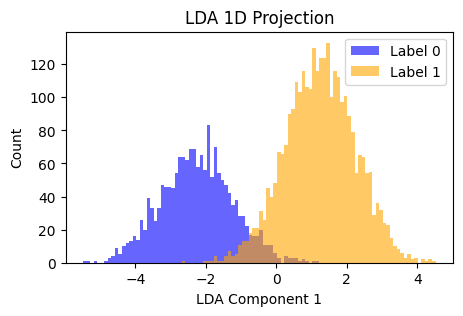

In [6]:
plt.figure(figsize=(5,3))
step_len = 0.1
plt.hist(feature_lda_binary[label_s1_binary == 0], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
plt.hist(feature_lda_binary[label_s1_binary == 1], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
plt.xlabel('LDA Component 1')
plt.ylabel('Count')
plt.title('LDA 1D Projection')
plt.legend()
plt.show()

 In the binary classification task, LDA finds a 1D projection direction that maximizes the ratio of inter-class variance to intra-class variance, thereby achieving the best class separability in the projected space. **(Fisher Discriminant Criterion)**

### multi label 1d-lda

In [7]:
lda_1 = LDA(n_components=1)
feature_lda_multi_1d = lda_1.fit_transform(feature_s1_flat, label_s1_multi)

/tmp/ipykernel_2865073/3811428577.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_multi_1d[label_s1_multi == 0], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
/tmp/ipykernel_2865073/3811428577.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_multi_1d[label_s1_multi == 1], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
/tmp/ipykernel_2865073/3811428577.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a 

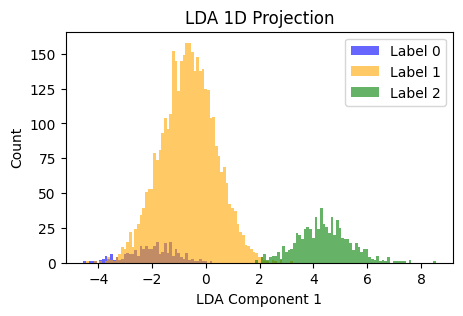

In [8]:
plt.figure(figsize=(5,3))
step_len = 0.1
plt.hist(feature_lda_multi_1d[label_s1_multi == 0], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
plt.hist(feature_lda_multi_1d[label_s1_multi == 1], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
plt.hist(feature_lda_multi_1d[label_s1_multi == 2], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='green', alpha=0.6, label='Label 2')
plt.xlabel('LDA Component 1')
plt.ylabel('Count')
plt.title('LDA 1D Projection')
plt.legend()
plt.show()

In a three-class classification task, the 1D projection of LDA is the direction that maximizes class separability by optimizing the Fisher criterion across all classes.

### multi label 2d-lda

In [ ]:
lda_2 = LDA(n_components=2)
feature_lda_multi_2d = lda_2.fit_transform(feature_s1_flat, label_s1_multi)

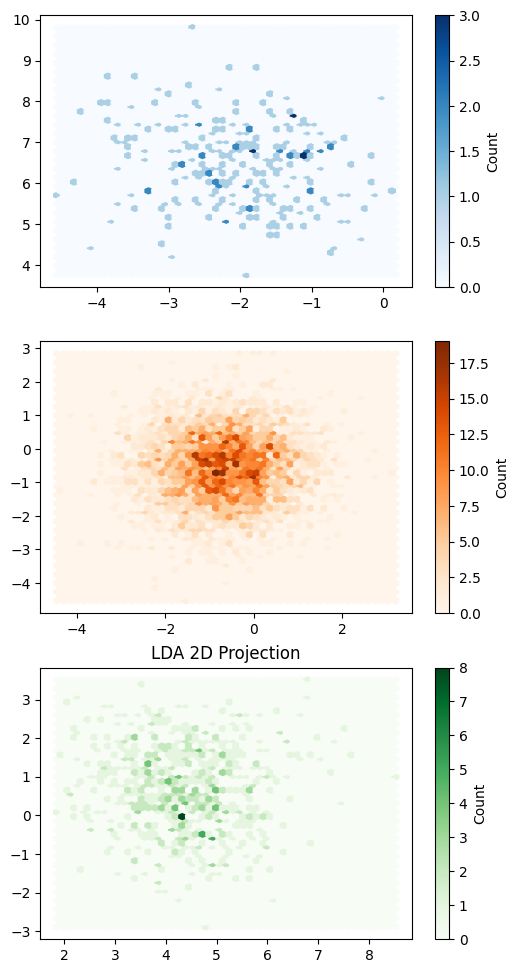

In [10]:
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 0, 0], feature_lda_multi_2d[label_s1_multi == 0, 1], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')

plt.subplot(3, 1, 2)
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 1, 0], feature_lda_multi_2d[label_s1_multi == 1, 1], gridsize=50, cmap='Oranges')
plt.colorbar(label='Count')

plt.subplot(3, 1, 3)
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 2, 0], feature_lda_multi_2d[label_s1_multi == 2, 1], gridsize=50, cmap='Greens')
plt.colorbar(label='Count')

plt.title('LDA 2D Projection')
plt.show()

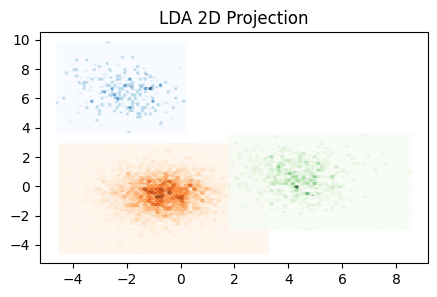

In [11]:
plt.figure(figsize=(5, 3))
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 0, 0], feature_lda_multi_2d[label_s1_multi == 0, 1], gridsize=50, alpha=0.6, cmap='Blues')
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 1, 0], feature_lda_multi_2d[label_s1_multi == 1, 1], gridsize=50, alpha=0.6, cmap='Oranges')
plt.hexbin(feature_lda_multi_2d[label_s1_multi == 2, 0], feature_lda_multi_2d[label_s1_multi == 2, 1], gridsize=50, alpha=0.6, cmap='Greens')

plt.title('LDA 2D Projection')
plt.show()

In a three-class classification task, 2D LDA projects the data onto a two-dimensional subspace that best separates the three classes by maximizing the between-class scatter while minimizing the within-class scatter.